In [20]:
from utils import *
from data_utils import *
from metrics import *
from plots import *

## Code to create dataset for Transfer Learning from the first 5 to the second 5 classes of MNIST

## Custom fuctions. Note: integrate into util.py

# Transfer Learning from the first 5 to the second 5 of MNIST. Default initialization with freezing.

In [21]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'
depth = 20

dataset = TransferLearningMNIST(batch_size)
dataset_wrapped = TransferLearningMNISTWrapper(dataset, 'pretrain')
params = dict(device=device,
                width=20, lr=0.01, num_train=4,
                sb=0.05, depth= depth, sw=1.7346938775510203, early_stop_patience = 2, activation_function='tanh')

model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params, gaussian_init = True).to(device)

In [22]:
dataset.output_dim

10

In [23]:
#print model summary
print(model)

Sequential(
  (linear0): Linear(in_features=784, out_features=20, bias=True)
  (activation0): Tanh()
  (linear1): Linear(in_features=20, out_features=20, bias=True)
  (activation1): Tanh()
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (activation2): Tanh()
  (linear3): Linear(in_features=20, out_features=20, bias=True)
  (activation3): Tanh()
  (linear4): Linear(in_features=20, out_features=20, bias=True)
  (activation4): Tanh()
  (linear5): Linear(in_features=20, out_features=20, bias=True)
  (activation5): Tanh()
  (linear6): Linear(in_features=20, out_features=20, bias=True)
  (activation6): Tanh()
  (linear7): Linear(in_features=20, out_features=20, bias=True)
  (activation7): Tanh()
  (linear8): Linear(in_features=20, out_features=20, bias=True)
  (activation8): Tanh()
  (linear9): Linear(in_features=20, out_features=20, bias=True)
  (activation9): Tanh()
  (linear10): Linear(in_features=20, out_features=20, bias=True)
  (activation10): Tanh()
  (linear11): Lin

In [24]:
results, variances = compute_layer_variances_dense(model, dataset_wrapped.train_loader, device = 'cpu',cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 15.409743309020996, Variance of Variance: 3.484145164489746
Layer activation0 - Variance: 0.8097245693206787, Variance of Variance: 0.07437217980623245
Layer linear1 - Variance: 1.5835767984390259, Variance of Variance: 0.46139901876449585
Layer activation1 - Variance: 0.4957600235939026, Variance of Variance: 0.06840561330318451
Layer linear2 - Variance: 0.7038707137107849, Variance of Variance: 0.18180197477340698
Layer activation2 - Variance: 0.323869526386261, Variance of Variance: 0.06001873314380646
Layer linear3 - Variance: 0.6562988758087158, Variance of Variance: 0.16227135062217712
Layer activation3 - Variance: 0.32102251052856445, Variance of Variance: 0.05551145225763321
Layer linear4 - Variance: 0.5653865337371826, Variance of Variance: 0.14385753870010376
Layer activation4 - Variance: 0.3006734848022461, Variance of Variance: 0.07032807171344757
Layer linear5 - Variance: 0.6256550550460815, Variance of Variance: 0.187720388174057
Layer activation

Layer linear0 - Variance: 0.08646665513515472, Variance of Variance: 0.026496902108192444
Layer linear1 - Variance: 0.07902465015649796, Variance of Variance: 0.0269260723143816
Layer linear2 - Variance: 0.08376527577638626, Variance of Variance: 0.018352659419178963
Layer linear3 - Variance: 0.0832359716296196, Variance of Variance: 0.02401408925652504
Layer linear4 - Variance: 0.0949992761015892, Variance of Variance: 0.0346856564283371
Layer linear5 - Variance: 0.09551259875297546, Variance of Variance: 0.0323590449988842
Layer linear6 - Variance: 0.09262201935052872, Variance of Variance: 0.030168749392032623
Layer linear7 - Variance: 0.07818511128425598, Variance of Variance: 0.033981289714574814
Layer linear8 - Variance: 0.07706693559885025, Variance of Variance: 0.026570944115519524
Layer linear9 - Variance: 0.0965542197227478, Variance of Variance: 0.023002618923783302
Layer linear10 - Variance: 0.08020898699760437, Variance of Variance: 0.027401579543948174
Layer linear11 - Va

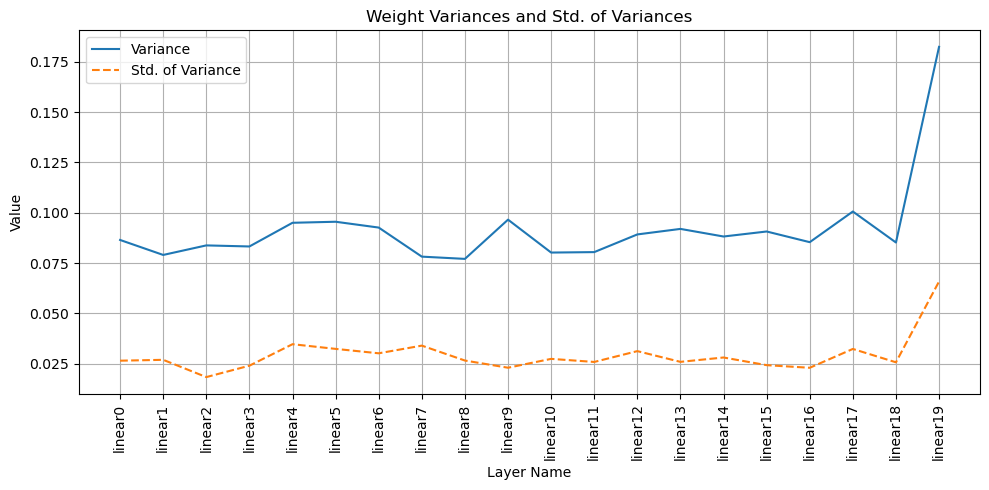

In [25]:
weight_variances = compute_weight_variances(model)
for layer_name, stats in weight_variances.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

# Plot the results
plot_weight_variances(weight_variances)

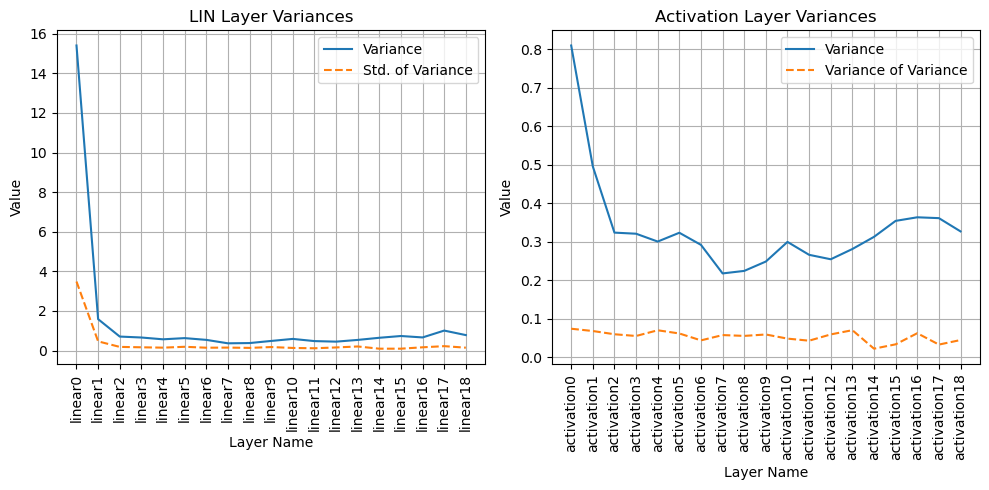

In [26]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True, std_of_variance = True )

In [27]:
pretrain_train_acc, pretrain_test_acc, pre_trained_model, pretraining_checkpoints = compute_training_acc_epochs(model, dataset_wrapped, params, debug=True, save_checkpoints=True)

Epoch: 0 	Training Accuracy: 66.08%
Validation Accuracy: 65.22%
Epoch: 1 	Training Accuracy: 72.31%
Validation Accuracy: 71.89%
Epoch: 2 	Training Accuracy: 83.64%
Validation Accuracy: 83.03%
Epoch: 3 	Training Accuracy: 87.36%
Validation Accuracy: 86.37%


In [28]:
# Save model state dictionary
torch.save(pre_trained_model.state_dict(), "pretrained_MNIST_model_50-50.pth")
torch.save(pretraining_checkpoints, 'pretrained_MNIST_model_50-50_checkpoints.pth')

Layer linear0 - Variance: 0.08643216639757156, Variance of Variance: 0.026591897010803223
Layer linear1 - Variance: 0.07840953767299652, Variance of Variance: 0.02624444104731083
Layer linear2 - Variance: 0.08346418291330338, Variance of Variance: 0.01847654953598976
Layer linear3 - Variance: 0.08277685940265656, Variance of Variance: 0.023520072922110558
Layer linear4 - Variance: 0.0945596694946289, Variance of Variance: 0.03380309417843819
Layer linear5 - Variance: 0.0954623594880104, Variance of Variance: 0.03174382448196411
Layer linear6 - Variance: 0.0926443412899971, Variance of Variance: 0.030533436685800552
Layer linear7 - Variance: 0.07816434651613235, Variance of Variance: 0.033133212476968765
Layer linear8 - Variance: 0.07699864357709885, Variance of Variance: 0.027384262531995773
Layer linear9 - Variance: 0.09668199717998505, Variance of Variance: 0.022986603900790215
Layer linear10 - Variance: 0.08046695590019226, Variance of Variance: 0.026985837146639824
Layer linear11 -

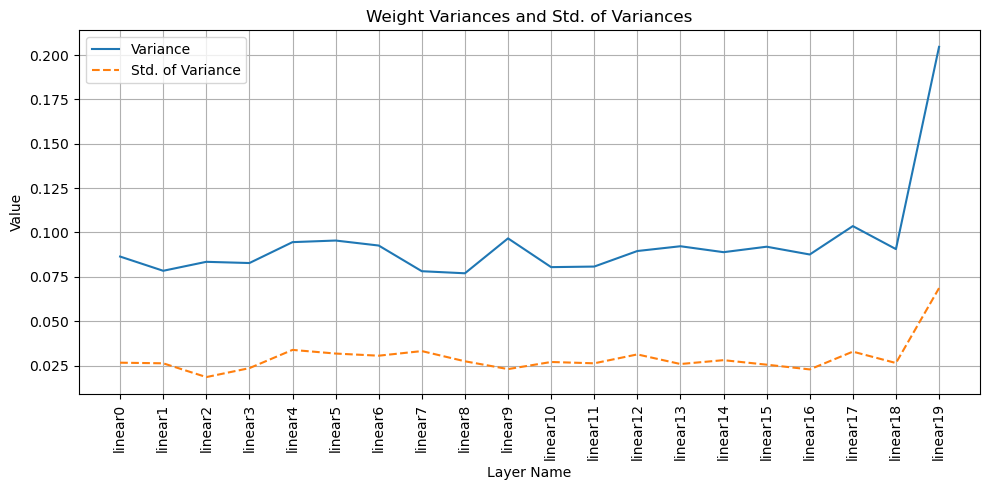

In [29]:
weight_variances = compute_weight_variances(model)
for layer_name, stats in weight_variances.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

# Plot the results
plot_weight_variances(weight_variances)

In [30]:
results, variances = compute_layer_variances_dense(pre_trained_model, dataset_wrapped.train_loader, device = 'cpu', cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 20.16935157775879, Variance of Variance: 4.012491226196289
Layer activation0 - Variance: 0.8575339913368225, Variance of Variance: 0.0683579295873642
Layer linear1 - Variance: 1.7471699714660645, Variance of Variance: 0.41045230627059937
Layer activation1 - Variance: 0.5284613966941833, Variance of Variance: 0.059820327907800674
Layer linear2 - Variance: 0.749410092830658, Variance of Variance: 0.17066603899002075
Layer activation2 - Variance: 0.3444943428039551, Variance of Variance: 0.053394485265016556
Layer linear3 - Variance: 0.7323639392852783, Variance of Variance: 0.1589491218328476
Layer activation3 - Variance: 0.34801214933395386, Variance of Variance: 0.052707210183143616
Layer linear4 - Variance: 0.6092117428779602, Variance of Variance: 0.1368979811668396
Layer activation4 - Variance: 0.3014034926891327, Variance of Variance: 0.059516116976737976
Layer linear5 - Variance: 0.6240059733390808, Variance of Variance: 0.16299711167812347
Layer activati

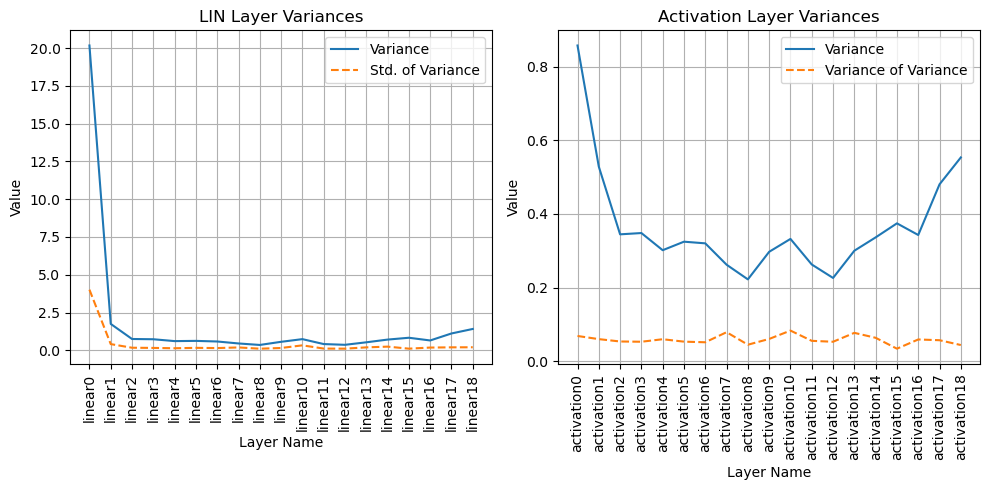

In [31]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True)

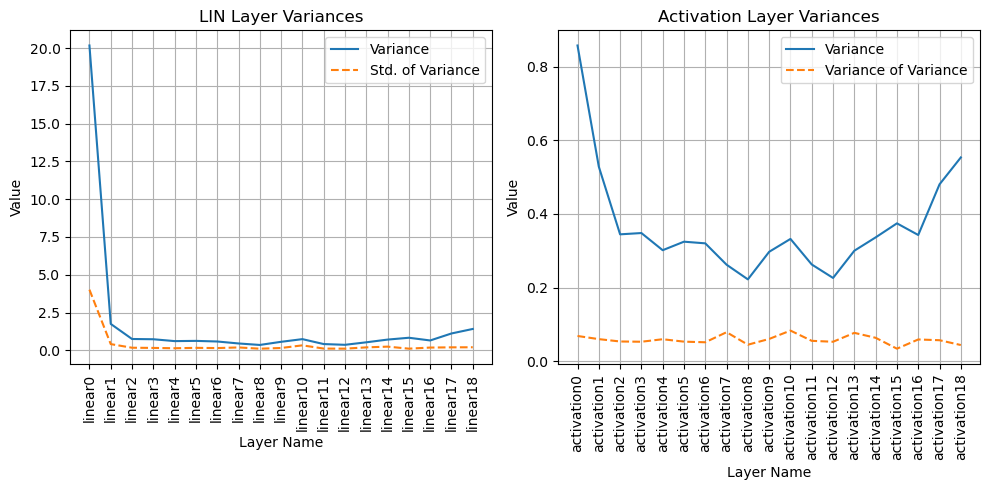

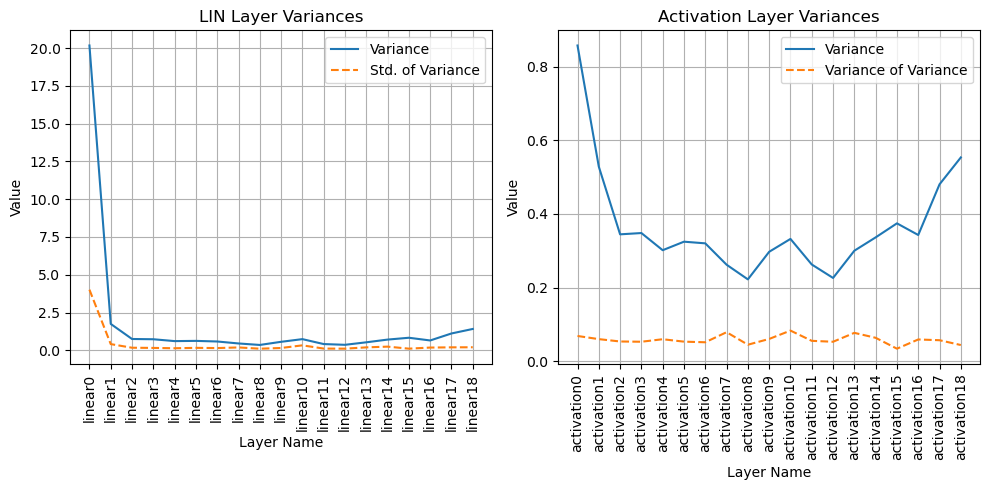

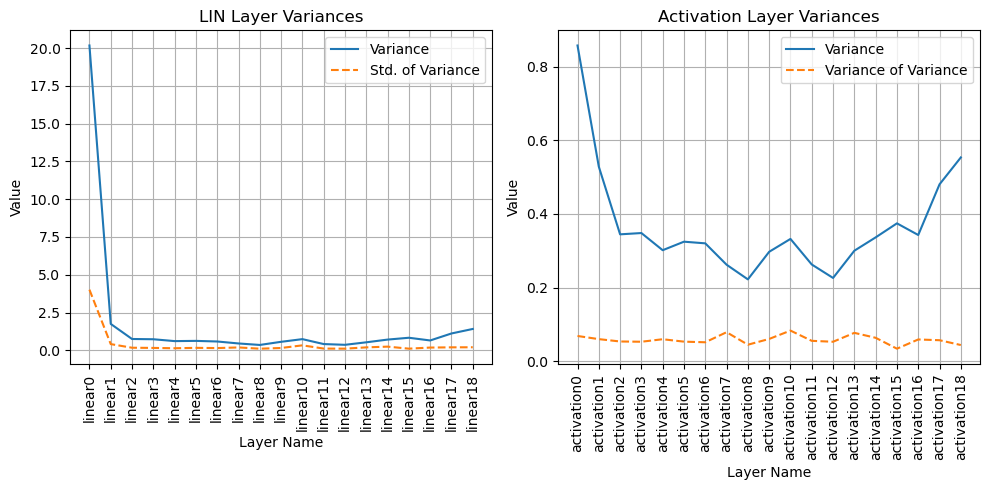

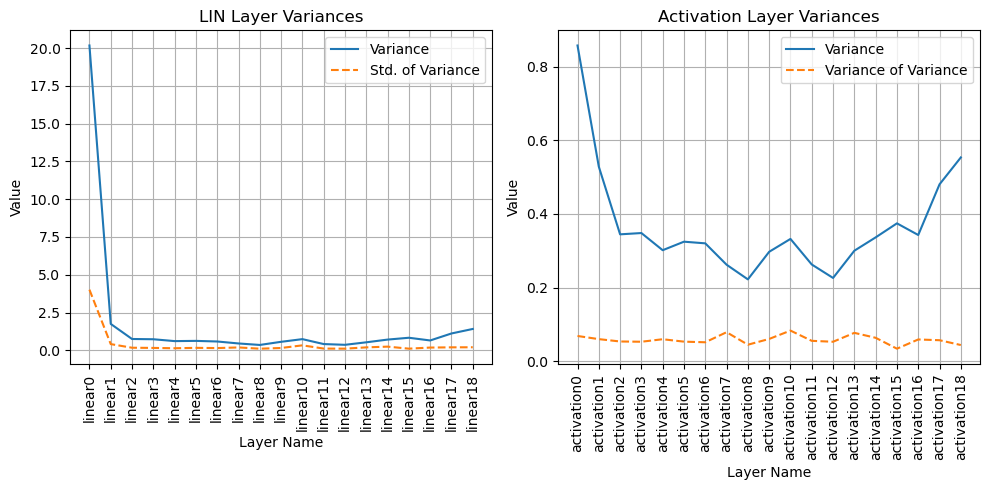

In [32]:
# Assuming your model and dataset variables are already defined
num_pretraining_checkpoints = len(pretraining_checkpoints)

# Create a function to extract variance of variances:
def extract_variance_of_variance_from_names(names, results):
    return [results[name]['variance_of_variance'] for name in names]

# Your original plotting code (for the baseline model) goes here...

model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params).to(device)

# Now, loop through the pretraining_checkpoints
for idx, checkpoint in enumerate(pretraining_checkpoints):
    # Load model state_dict from checkpoint
    model.load_state_dict(checkpoint['model_state_dict'])
    
    # Compute the layer variances for the checkpointed model
    results_checkpoint, variances_checkpoint = compute_layer_variances_dense(model, dataset_wrapped.train_loader, device='cpu', cnn=False)
    
    plot_variances_by_layer_type(variances_checkpoint, results_checkpoint, cnn = False, ignore_final_layer=True)

In [33]:
test_acc = eval(pre_trained_model, device, dataset.pretrain_test_loader, False)
print(f"Test Accuracy on training classes: {test_acc:.2f}")


Test Accuracy on training classes: 0.88


#### finetuning expermient

In [34]:
dataset_wrapped.update_phase('finetune')

In [35]:
results, variances = compute_layer_variances_dense(pre_trained_model, dataset_wrapped.train_loader, device = 'cpu', cnn=False)
for layer_name, stats in results.items():
    print(f"Layer {layer_name} - Variance: {stats['variance']}, Variance of Variance: {stats['variance_of_variance']}")

Layer linear0 - Variance: 18.687938690185547, Variance of Variance: 3.499190330505371
Layer activation0 - Variance: 0.8252309560775757, Variance of Variance: 0.07088802009820938
Layer linear1 - Variance: 1.6977272033691406, Variance of Variance: 0.36314669251441956
Layer activation1 - Variance: 0.5138140320777893, Variance of Variance: 0.0562165267765522
Layer linear2 - Variance: 0.7135186791419983, Variance of Variance: 0.18485888838768005
Layer activation2 - Variance: 0.31618809700012207, Variance of Variance: 0.054362013936042786
Layer linear3 - Variance: 0.6444893479347229, Variance of Variance: 0.17292208969593048
Layer activation3 - Variance: 0.31846117973327637, Variance of Variance: 0.05823633074760437
Layer linear4 - Variance: 0.5468224287033081, Variance of Variance: 0.15307052433490753
Layer activation4 - Variance: 0.267053484916687, Variance of Variance: 0.06506703794002533
Layer linear5 - Variance: 0.5550112128257751, Variance of Variance: 0.1756868213415146
Layer activati

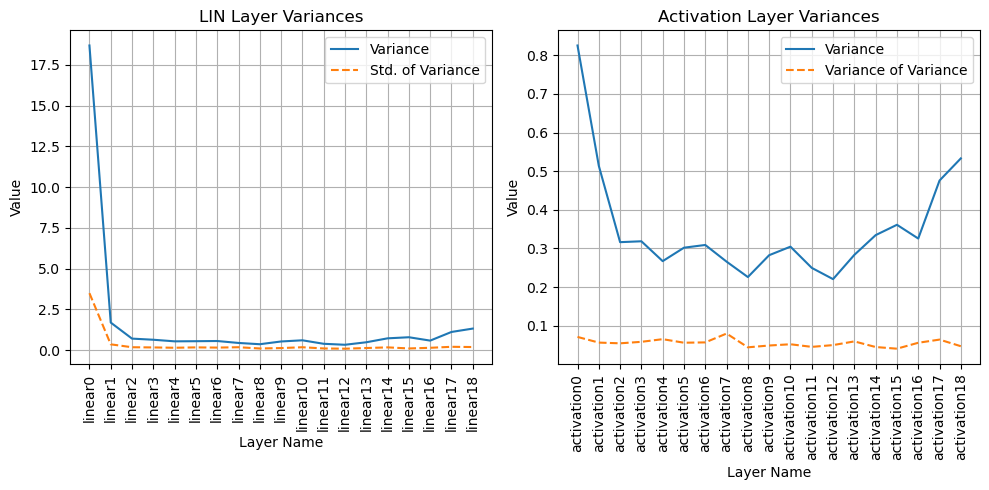

In [36]:
plot_variances_by_layer_type(variances, results, cnn = False, ignore_final_layer=True)

In [37]:
pre_trained_model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params).to(device)

pre_trained_model.load_state_dict(torch.load("pretrained_MNIST_model_50-50.pth"))


<All keys matched successfully>

In [38]:
from tqdm import tqdm

num_experiments = 5
experiments = []

for i in tqdm(range(num_experiments)):
    print('experiment number: ', i)
    cut_models = []
    for cut in range(depth):
        temp = {}
        temp['cut_model'] = cut_model(pre_trained_model, cut_point = cut, freeze = True)
        finetuned_acc, finetuned_test_acc, finetuned_model ,checkpoints_temp = compute_training_acc_epochs(temp['cut_model'], dataset_wrapped, params, debug=True)
        temp['finetuned_acc'] = finetuned_acc
        temp['finetuned_test_acc'] = finetuned_test_acc
        temp['finetuned_model'] = finetuned_model
        temp['checkpoints'] = checkpoints_temp
        cut_models.append(temp)  
    experiments.append(cut_models)

  0%|          | 0/5 [00:00<?, ?it/s]

experiment number:  0
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 20.03%
Validation Accuracy: 18.71%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 3 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.22278911564

 20%|██        | 1/5 [03:13<12:53, 193.50s/it]

experiment number:  1
Epoch: 0 	Training Accuracy: 20.10%
Validation Accuracy: 20.37%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 2 	Training Accuracy: 20.03%
Validation Accuracy: 18.71%
val_acc: 0.1870748299319728, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 3 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
Epoch: 1 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
val_acc: 0.1989795918367347, max_val_acc: 0.1989795918367347, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 3 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 0 	Training Accuracy: 20.03%
Validation Accuracy: 18.71%
Epoch: 1 	Training Accuracy: 20.10%
Validation

 40%|████      | 2/5 [06:24<09:35, 191.76s/it]

experiment number:  2
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 20.10%
Validation Accuracy: 20.37%
Epoch: 1 	Training Accuracy: 20.10%
Validation Accuracy: 20.37%
val_acc: 0.20374149659863947, max_val_acc: 0.20374149659863947, no_improve_epochs: 1
E

 60%|██████    | 3/5 [09:30<06:18, 189.14s/it]

experiment number:  3
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
val_acc: 0.1989795918367347, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 20.03%
Validation Accuracy: 18.71%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.22278911564

 80%|████████  | 4/5 [12:37<03:08, 188.33s/it]

experiment number:  4
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 20.27%
Validation Accuracy: 19.90%
val_acc: 0.1989795918367347, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epoch: 2 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 2
Early stopping invoked.
Epoch: 0 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
Epoch: 1 	Training Accuracy: 21.20%
Validation Accuracy: 22.28%
val_acc: 0.2227891156462585, max_val_acc: 0.2227891156462585, no_improve_epochs: 1
Epo

100%|██████████| 5/5 [15:46<00:00, 189.36s/it]


In [41]:
torch.save(experiments, 'experiments_results_MNIST_50-50.pth')

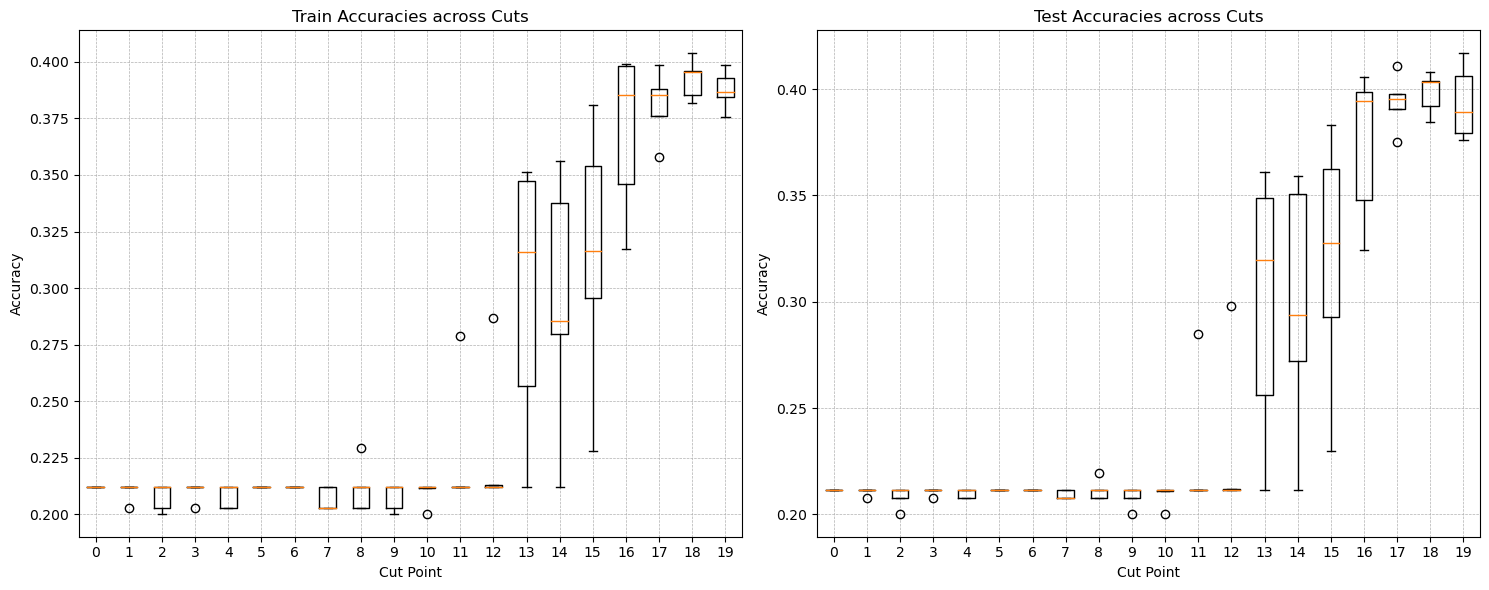

In [42]:
import matplotlib.pyplot as plt

# Initialize lists to store all accuracies for each cut point
train_accuracies = [[] for _ in range(depth)]
test_accuracies = [[] for _ in range(depth)]

# Populate the lists with accuracy values
for cut_models in experiments:
    for cut, model_data in enumerate(cut_models):
        train_accuracies[cut].append(model_data['finetuned_acc'])
        test_accuracies[cut].append(model_data['finetuned_test_acc'])

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot training accuracies
axs[0].boxplot(train_accuracies)
axs[0].set_title('Train Accuracies across Cuts')
axs[0].set_xlabel('Cut Point')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(range(1, depth + 1))
axs[0].set_xticklabels(range(depth))
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot test accuracies
axs[1].boxplot(test_accuracies)
axs[1].set_title('Test Accuracies across Cuts')
axs[1].set_xlabel('Cut Point')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(range(1, depth + 1))
axs[1].set_xticklabels(range(depth))
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plots
plt.tight_layout()
plt.show()

----

In [19]:
cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(pre_trained_model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_train_acc, finetuned_test_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], dataset_wrapped, params, debug=True)
    temp['finetuned_train_acc'] = finetuned_train_acc
    temp['finetuned_test_acc'] = finetuned_test_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

Epoch: 0 	Training Accuracy: 73.21%
Validation Accuracy: 74.49%
Epoch: 1 	Training Accuracy: 83.59%
Validation Accuracy: 83.71%
Epoch: 2 	Training Accuracy: 87.89%
Validation Accuracy: 87.72%
Epoch: 3 	Training Accuracy: 89.93%
Validation Accuracy: 90.00%
Epoch: 0 	Training Accuracy: 57.77%
Validation Accuracy: 58.10%
Epoch: 1 	Training Accuracy: 69.55%
Validation Accuracy: 70.51%
Epoch: 2 	Training Accuracy: 75.39%
Validation Accuracy: 76.80%
Epoch: 3 	Training Accuracy: 79.60%
Validation Accuracy: 80.37%
Epoch: 0 	Training Accuracy: 55.61%
Validation Accuracy: 56.43%
Epoch: 1 	Training Accuracy: 61.05%
Validation Accuracy: 61.56%
Epoch: 2 	Training Accuracy: 64.00%
Validation Accuracy: 65.00%
Epoch: 3 	Training Accuracy: 67.67%
Validation Accuracy: 68.50%
Epoch: 0 	Training Accuracy: 49.88%
Validation Accuracy: 51.22%
Epoch: 1 	Training Accuracy: 55.54%
Validation Accuracy: 57.07%
Epoch: 2 	Training Accuracy: 57.20%
Validation Accuracy: 58.71%
Epoch: 3 	Training Accuracy: 58.77%
Vali

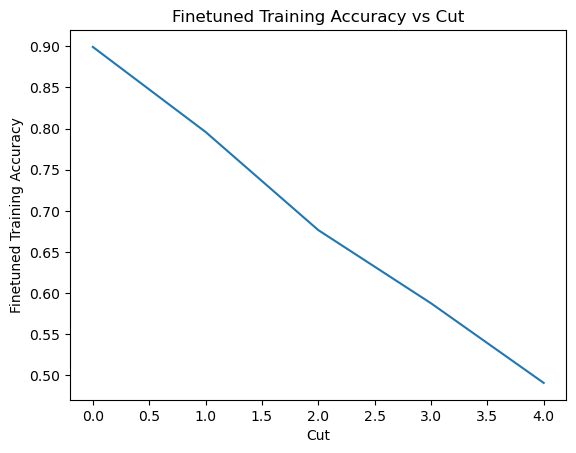

In [20]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_train_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Training Accuracy')
plt.title('Finetuned Training Accuracy vs Cut')
plt.show()

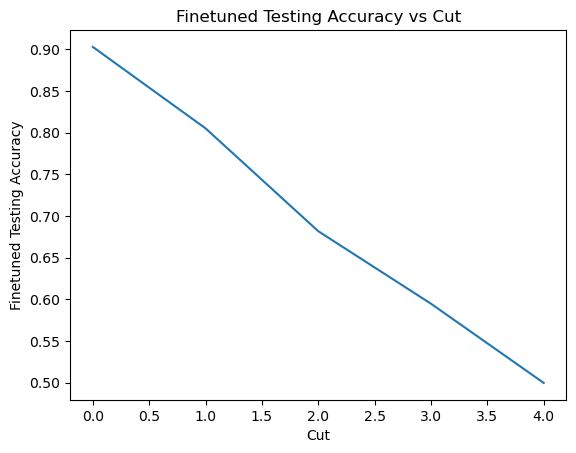

In [21]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_test_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Testing Accuracy')
plt.title('Finetuned Testing Accuracy vs Cut')
plt.show()

-----

## Fashion Mnist

### Baseline, end to end trained model

In [4]:
batch_size = 128
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'mps'
depth = 5

fashion_dataset = FashionMNISTtrainer(batch_size)
params = dict(device=device,
                width=50, lr=0.01, num_train=4,
                sb=1, depth= depth, sw=1.5)

fashion_model = generate_fc_dnn(dataset.input_dim, dataset.output_dim,
                params['depth'], params['width']).to(device)

pretrain_acc, pre_trained_model = compute_training_acc_epochs(fashion_model, fashion_dataset, params, debug=True)

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Tanh()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): Tanh()
  (8): Linear(in_features=50, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
) SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Train set: Average loss: 0.8191, Accuracy: 42975.0/60000 (72%)

Epoch: 0 	Training Accuracy: 71.62%

Train set: Average loss: 0.6768, Accuracy: 45237.0/60000 (75%)

Epoch: 1 	Training Accuracy: 75.39%

Train set: Average loss: 0.6093, Accuracy: 46827.0/60000 (78%)

Epoch: 2 	Training Accuracy: 78.05%

Train set: Average loss: 0.5691, Accuracy: 47610.0/60000 (79%)

Epoch: 3 	Training Accuracy: 79.35%

Train set: Average loss: 0.5691, 

### finetuned staring from regular mnist 

In [6]:
#luckily, the number of classes is the same, so we don't need to change the last layer.

cut_models = []

for cut in range(depth):
    temp = {}
    temp['cut_model'] = cut_model(model, sw = 1.5, sb = 1, cut_point = cut)
    finetuned_acc, finetuned_model = compute_training_acc_epochs(temp['cut_model'], fashion_dataset, params, debug=False)
    temp['finetuned_acc'] = finetuned_acc
    temp['finetuned_model'] = finetuned_model
    cut_models.append(temp)   

In [9]:
from pprint import pprint

for i, mod in enumerate(cut_models):
    print(f"Cut {i}:")
    pprint(mod['finetuned_acc'])

Cut 0:
0.7911
Cut 1:
0.7381833333333333
Cut 2:
0.6858333333333333
Cut 3:
0.6187833333333334
Cut 4:
0.27591666666666664


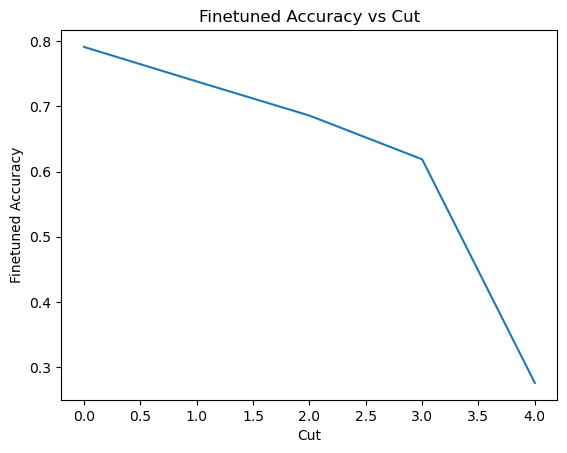

In [7]:
import matplotlib.pyplot as plt

finetuned_accs = [model['finetuned_acc'] for model in cut_models]
cuts = range(len(finetuned_accs))
plt.plot(cuts, finetuned_accs)
plt.xlabel('Cut')
plt.ylabel('Finetuned Accuracy')
plt.title('Finetuned Accuracy vs Cut')
plt.show()

----